In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

import os

In [5]:
df=pd.read_csv('data.csv')
df.head()

,laser power,scan speed,hatch spacing,layer thickness,density
0,70,287,100.0,40,94.60
1,90,1500,56.0,25,95.00
2,90,600,84.0,25,99.10
3,90,300,84.0,25,99.25
4,90,300,84.0,25,99.00


### Preprocession steps

|Sr.No.| Step | Option 1 | Option 2 |
|---| --- | --- | --- |
|1| Missing value | info | isnull |
|2| Encoding |  |  |
|3| Outlier | boxplot |  |
|4| Feature scaling |  |  |
|5| Imbalance |  |  |

In [7]:
# Missing value 
df.isnull().sum()

laser power        0
scan speed         0
hatch spacing      0
layer thickness    0
density            0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   laser power      38 non-null     int64  
 1   scan speed       38 non-null     int64  
 2   hatch spacing    38 non-null     float64
 3   layer thickness  38 non-null     int64  
 4   density          38 non-null     float64
dtypes: float64(2), int64(3)
memory usage: 1.6 KB


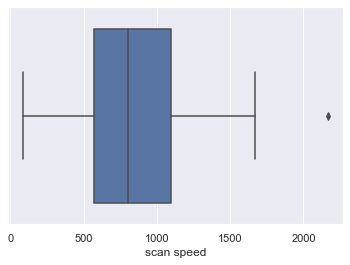

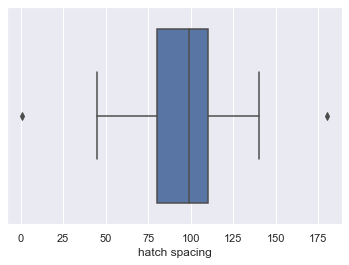

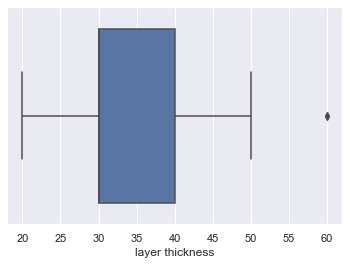

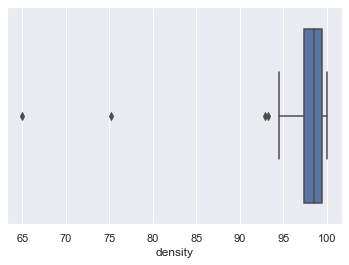

In [9]:
# outlier detection
def boxplot(col):
    sns.boxplot(df[col])
    plt.show()

for i in list(df.columns)[1:]:
    boxplot(i)

In [10]:
Q1= df.quantile(0.25)
Q3= df.quantile(0.75)
IQR= Q3-Q1
pos_outlier= Q3+1.5*IQR
neg_outlier= Q1-1.5*IQR

In [11]:
df= df[~((df<neg_outlier)|(df>pos_outlier)).any(axis=1)]

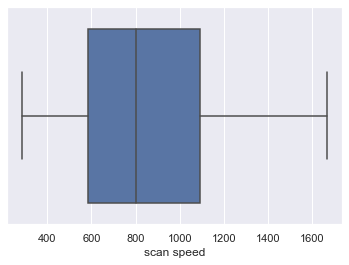

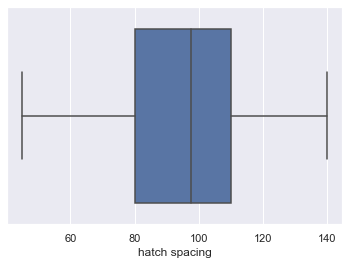

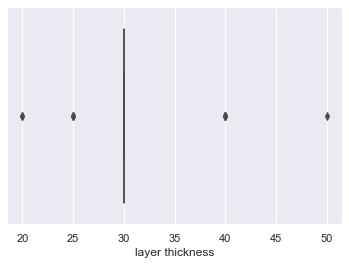

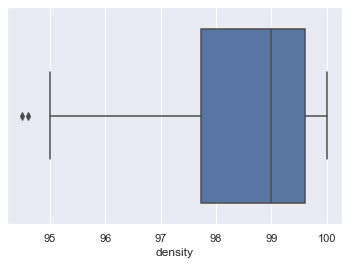

In [12]:
# outlier detection
def boxplot(col):
    sns.boxplot(df[col])
    plt.show()

for i in list(df.columns)[1:]:
    boxplot(i)

<AxesSubplot:xlabel='density', ylabel='Density'>

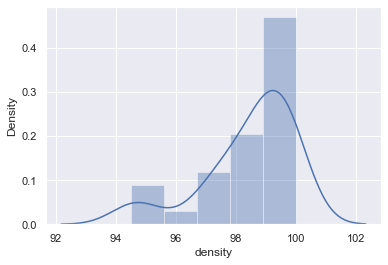

In [13]:
# Check distribution of dependent variable
sns.distplot(df['density'])

In [14]:
df.columns

Index(['laser power', 'scan speed', 'hatch spacing', 'layer thickness',
       'density'],
      dtype='object')

In [15]:
# Split df into x and y
x= df[['laser power', 'scan speed', 'hatch spacing', 'layer thickness']]
y= df['density']

In [16]:
x

,laser power,scan speed,hatch spacing,layer thickness
0,70,287,100.0,40
1,90,1500,56.0,25
2,90,600,84.0,25
3,90,300,84.0,25
4,90,300,84.0,25
5,95,350,140.0,30
9,120,492,100.0,40
10,150,1250,80.0,30
11,150,714,140.0,30
12,150,750,120.0,30


In [17]:
y

0      94.60
1      95.00
2      99.10
3      99.25
4      99.00
5      98.00
9      99.63
10     96.57
11     97.46
12     98.72
13     98.59
14     99.86
15     99.84
16     99.73
17     99.29
18     99.12
19     99.75
20     99.58
21    100.00
22     99.83
25     98.00
26     97.36
27     97.38
28     97.35
29     99.24
30     99.70
31     99.27
33     98.50
34     98.50
35     98.50
36     94.50
Name: density, dtype: float64

In [18]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_scaled= scaler.fit_transform(x)

In [19]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable= x_scaled

vif= pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variable,i) for i in range(variable.shape[1])]
vif['Features']= x.columns
vif

,VIF,Features
0,1.168882,laser power
1,1.304827,scan speed
2,1.196944,hatch spacing
3,1.065346,layer thickness


In [20]:
# Split data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, train_size=0.8, random_state=1)

In [21]:
# Build a linear model by OLS

from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [22]:
reg_model= smf.OLS(endog= y_train, exog= x_train).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                density   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              381.6
Date:                Thu, 22 Dec 2022   Prob (F-statistic):                    1.42e-18
Time:                        10:27:33   Log-Likelihood:                         -92.038
No. Observations:                  24   AIC:                                      192.1
Df Residuals:                      20   BIC:                                      196.8
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
laser power         0.0125      0.044      0.283      0.780      -0.080       0.105
scan speed          0.0226      0.008      2.881      0.009       0.006       0.039
hatch spacing       0.3556      0.087      4.075      0.001       0.174       0.538
layer thickness     1.2479      0.331      3.775      0.001       0.558       1.937
==============================================================================
Omnibus:                        3.027   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.220   Jarque-Bera (JB):                1.549
Skew:                           0.560   Prob(JB):                        0.461
Kurtosis:                       3.542   Cond. No.                         124.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

p>0.05 for laser power. We should drop it.

In [23]:
x= df[['scan speed', 'hatch spacing', 'layer thickness']]

In [24]:
# Split data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, train_size=0.8, random_state=1)

In [25]:
# Build a linear model by OLS

from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

reg_model= smf.OLS(endog= y_train, exog= x_train).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                density   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              532.2
Date:                Thu, 22 Dec 2022   Prob (F-statistic):                    5.84e-20
Time:                        10:30:36   Log-Likelihood:                         -92.086
No. Observations:                  24   AIC:                                      190.2
Df Residuals:                      21   BIC:                                      193.7
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
scan speed          0.0238      0.006      3.685      0.001       0.010       0.037
hatch spacing       0.3597      0.084      4.271      0.000       0.185       0.535
layer thickness     1.2703      0.314      4.047      0.001       0.618       1.923
==============================================================================
Omnibus:                        2.703   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.259   Jarque-Bera (JB):                1.343
Skew:                           0.529   Prob(JB):                        0.511
Kurtosis:                       3.471   Cond. No.                         119.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checks

|Sr.No.| Step | Requirement | Decision |
|---| --- | --- | --- |
|1| Adjusted R2 | >70 | Ok |
|2| Check p-value | <0.05 | Ok  |
|3| No heteroscadicity |  | Ok |
|4| No auto correlation | Durbin-Watson test 1.5-2.5 | Ok |
|5| No multi collinearity | VIF<5 | Ok |

In [28]:
y_density= reg_model.predict(x)

df['Density predicted']=y_density
df

,laser power,scan speed,hatch spacing,layer thickness,density,Density predicted
0,70,287,100.0,40,94.60,93.618651
1,90,1500,56.0,25,95.00,87.655669
2,90,600,84.0,25,99.10,76.271661
3,90,300,84.0,25,99.25,69.120078
4,90,300,84.0,25,99.00,69.120078
5,95,350,140.0,30,98.00,96.804743
9,120,492,100.0,40,99.63,98.505566
10,150,1250,80.0,30,96.57,96.679335
11,150,714,140.0,30,97.46,105.481996
12,150,750,120.0,30,98.72,99.146801


### Conclusion
- All checks are Ok. So, Linear regression model is good for prediction.